In [56]:
%matplotlib inline
from context import spew
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
from geopandas import GeoDataFrame
import re
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')

rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

In [113]:
def construct_grid(vent, north, east, south, west, elevation, spacing):
    
    x_east = np.linspace(vent.coords[0][0], vent.coords[0][0] + (east * spacing), east + 1)
    x_west = np.linspace(vent.coords[0][0] - west * spacing, vent.coords[0][0], west + 1)
    x = np.concatenate((x_west[:-1], x_east))
    y_south = np.linspace(vent.coords[0][1] - south * spacing, vent.coords[0][1], south + 1)
    y_north = np.linspace(vent.coords[0][1], vent.coords[0][1] + north * spacing, north + 1)
    y = np.concatenate((y_south[:-1], y_north))
    xx, yy = np.meshgrid(x, y)
    print(xx, yy)
    
    cols = ['Easting', 'Northing', 'Elev.']

    df = pd.DataFrame(columns=cols)
    for i, c in enumerate(xx):
        for j, p in enumerate(c):

            df = df.append({
                'Easting': int(p),
                'Northing': int(yy[i][j]),
                'Elev.': int(elevation)
            },
                ignore_index=True)

    geometry = [Point(xy) for xy in zip(df.Easting, df.Northing)]
    crs = {'init': 'epsg:4326'}
    df = GeoDataFrame(df, crs=crs, geometry=geometry)
    return df


def write_grid_file(df, filename):
    df.to_csv(filename, sep=' ', columns=['Easting', 'Northing', 'Elev.'],
              index=False, header=False)

[[530290. 532290. 534290.]
 [530290. 532290. 534290.]
 [530290. 532290. 534290.]] [[1380690. 1380690. 1380690.]
 [1382690. 1382690. 1382690.]
 [1384690. 1384690. 1384690.]]
9
[[526290. 528290. 530290. 532290. 534290. 536290. 538290.]
 [526290. 528290. 530290. 532290. 534290. 536290. 538290.]
 [526290. 528290. 530290. 532290. 534290. 536290. 538290.]
 [526290. 528290. 530290. 532290. 534290. 536290. 538290.]
 [526290. 528290. 530290. 532290. 534290. 536290. 538290.]
 [526290. 528290. 530290. 532290. 534290. 536290. 538290.]
 [526290. 528290. 530290. 532290. 534290. 536290. 538290.]] [[1376690. 1376690. 1376690. 1376690. 1376690. 1376690. 1376690.]
 [1378690. 1378690. 1378690. 1378690. 1378690. 1378690. 1378690.]
 [1380690. 1380690. 1380690. 1380690. 1380690. 1380690. 1380690.]
 [1382690. 1382690. 1382690. 1382690. 1382690. 1382690. 1382690.]
 [1384690. 1384690. 1384690. 1384690. 1384690. 1384690. 1384690.]
 [1386690. 1386690. 1386690. 1386690. 1386690. 1386690. 1386690.]
 [1388690. 1388

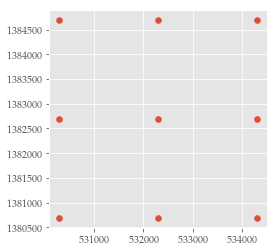

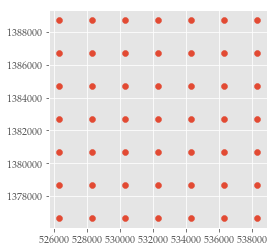

In [115]:
vent = Point(532290, 1382690)
grid1 = construct_grid(vent, 1, 1, 1, 1, 0, 2000)
grid1.plot()

print(len(grid1))

# write_grid_file(grid1, "small_grid.utm")

grid2 = construct_grid(vent, 3, 3, 3, 3, 0, 2000)

grid2.plot()

# write_grid_file(grid2, "large_grid.utm")

print(len(grid2))

In [64]:
FTT = [288, 3600]
K = [0.5, 1000]
median = [-3, 3]
grid = [0, 1]
# gridlist = [grid1, grid2]
config = {
    "vent_easting": 532290,
    "vent_northing": 1382690,
    "vent_elevation": 614,
    "plume_height": 25000,
    "alpha": 1.04487,
    "beta": 1.46425,
    "eruption_mass": 1882315000000,
    "max_grainsize": -4.5,
    "min_grainsize": 4.5,
    "median_grainsize": 0,
    "std_grainsize": 1.8,
    "eddy_const": 0.04,
    "diffusion_coefficient": 0.5,
    "fall_time_threshold": 288,
    "lithic_density": 2700.0,
    "pumice_density": 1000.0,
    "col_steps": 75,
    "part_steps": 8,
    "plume_model": 2
}

kays = [0,1]
for f in FTT:
    for k in kays:
        for m in median:
            filename = "ftt_%s_k_%s_gs_%s.conf"%(f, k, m)
            print(filename)
            config["fall_time_threshold"] = f
            config["diffusion_coefficient"] = K[k]
            config["median_grainsize"] = m
            write_config_file(config, filename)


ftt_288_k_0_gs_-3.conf
VENT_EASTING 532290
VENT_NORTHING 1382690
VENT_ELEVATION 614
PLUME_HEIGHT 25000
ALPHA 1.04487
BETA 1.46425
ERUPTION_MASS 1882315000000
MAX_GRAINSIZE -4.5
MIN_GRAINSIZE 4.5
MEDIAN_GRAINSIZE -3
STD_GRAINSIZE 1.8
EDDY_CONST 0.04
DIFFUSION_COEFFICIENT 0.5
FALL_TIME_THRESHOLD 288
LITHIC_DENSITY 2700.0
PUMICE_DENSITY 1000.0
COL_STEPS 75
PART_STEPS 8
PLUME_MODEL 2
ftt_288_k_0_gs_3.conf
VENT_EASTING 532290
VENT_NORTHING 1382690
VENT_ELEVATION 614
PLUME_HEIGHT 25000
ALPHA 1.04487
BETA 1.46425
ERUPTION_MASS 1882315000000
MAX_GRAINSIZE -4.5
MIN_GRAINSIZE 4.5
MEDIAN_GRAINSIZE 3
STD_GRAINSIZE 1.8
EDDY_CONST 0.04
DIFFUSION_COEFFICIENT 0.5
FALL_TIME_THRESHOLD 288
LITHIC_DENSITY 2700.0
PUMICE_DENSITY 1000.0
COL_STEPS 75
PART_STEPS 8
PLUME_MODEL 2
ftt_288_k_1_gs_-3.conf
VENT_EASTING 532290
VENT_NORTHING 1382690
VENT_ELEVATION 614
PLUME_HEIGHT 25000
ALPHA 1.04487
BETA 1.46425
ERUPTION_MASS 1882315000000
MAX_GRAINSIZE -4.5
MIN_GRAINSIZE 4.5
MEDIAN_GRAINSIZE -3
STD_GRAINSIZE 1.8
EDD